In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
medical_df = pd.read_csv("medical-charges.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.isna().sum()
medical_df["sex"].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [4]:
medical_df["smoker"].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
medical_df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()
Age = medical_df["age"]
Bmi = medical_df["bmi"]

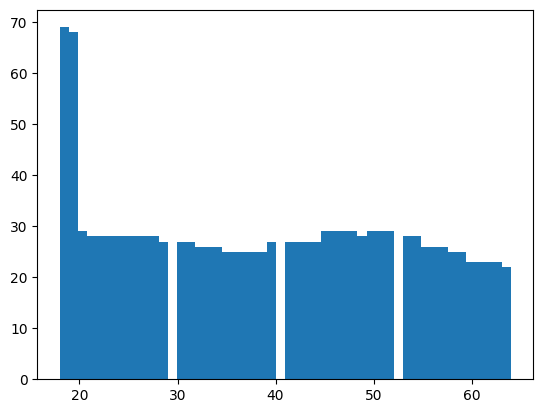

In [8]:
plot = plt.hist(Age, bins= 50)

In [9]:
sex_dumies = pd.get_dummies(medical_df.sex).astype(int)

In [10]:
smoker_dumies = pd.get_dummies(medical_df.smoker).astype(int)

In [11]:
region_dumies= pd.get_dummies(medical_df.region).astype(int)


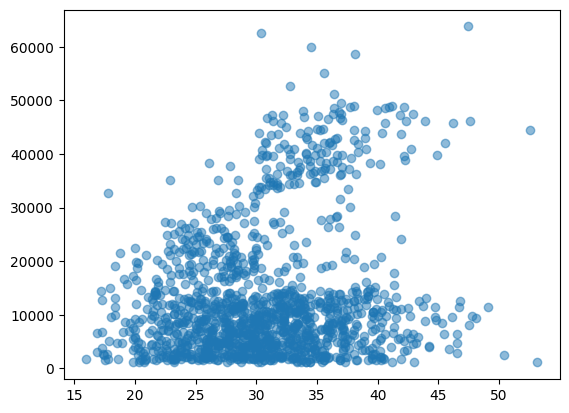

In [12]:
plot = plt.scatter(x=medical_df["bmi"], y= medical_df["charges"] , alpha = 0.5)

In [13]:
data= pd.concat([medical_df,sex_dumies,smoker_dumies,region_dumies],axis = "columns" )
data

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [14]:
final_data= data.drop(["sex","smoker","region","female","yes","southwest"], axis= "columns")
final_data

,age,bmi,children,charges,male,no,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,0,0,0,0
1,18,33.770,1,1725.55230,1,1,0,0,1
2,28,33.000,3,4449.46200,1,1,0,0,1
3,33,22.705,0,21984.47061,1,1,0,1,0
4,32,28.880,0,3866.85520,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,1,0
1334,18,31.920,0,2205.98080,0,1,1,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,1
1336,21,25.800,0,2007.94500,0,1,0,0,0


In [15]:
upper_bmi = final_data["bmi"].mean()+3*final_data["bmi"].std()
upper_bmi

48.95795759602359

In [16]:
final_data["bmi"]= np.where(final_data["bmi"]>upper_bmi,upper_bmi,final_data["bmi"])

In [17]:
final_data["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x= final_data.drop(["charges"], axis = "columns")
y= final_data["charges"]
y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
x_train, y_train, x_test, y_test = train_test_split(x,y, test_size =0.2, random_state = 42)

In [20]:
model.fit(x_train,x_test)


LinearRegression()

In [21]:
some_data = x_train[:5]
some_labels = x_test[:5]
predict_labels= model.predict(some_data)
predict_labels

array([ 7069.35799493,  8331.56612986,  9138.00277953, 11134.01389061,
       10063.16686718])

In [22]:
some_labels

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [24]:
mse= mean_squared_error(some_labels,predict_labels)
rmse= np.sqrt(mse)
rmse

8247.310988473238